# Rigde Regression

In [124]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from proj1_helpers import load_csv_data

data_path = 'data/train.csv'
y, tx, ids = load_csv_data(data_path, sub_sample=False)


[ 1.75864e+02  1.69150e+01  1.34805e+02  1.64050e+01 -9.99000e+02
 -9.99000e+02 -9.99000e+02  3.89100e+00  1.64050e+01  5.79830e+01
  1.05600e+00 -1.38500e+00 -9.99000e+02  2.82090e+01 -2.19700e+00
 -2.23100e+00  2.97740e+01  7.98000e-01  1.56900e+00  2.72300e+00
 -8.71000e-01  5.31310e+01  0.00000e+00 -9.99000e+02 -9.99000e+02
 -9.99000e+02 -9.99000e+02 -9.99000e+02 -9.99000e+02  0.00000e+00]


### Check the data
In order to get a good feel of the dataset, we do some inference on the set. In the plot below we see that we have a lot of values that are -999. Those should be removed from the dataset.

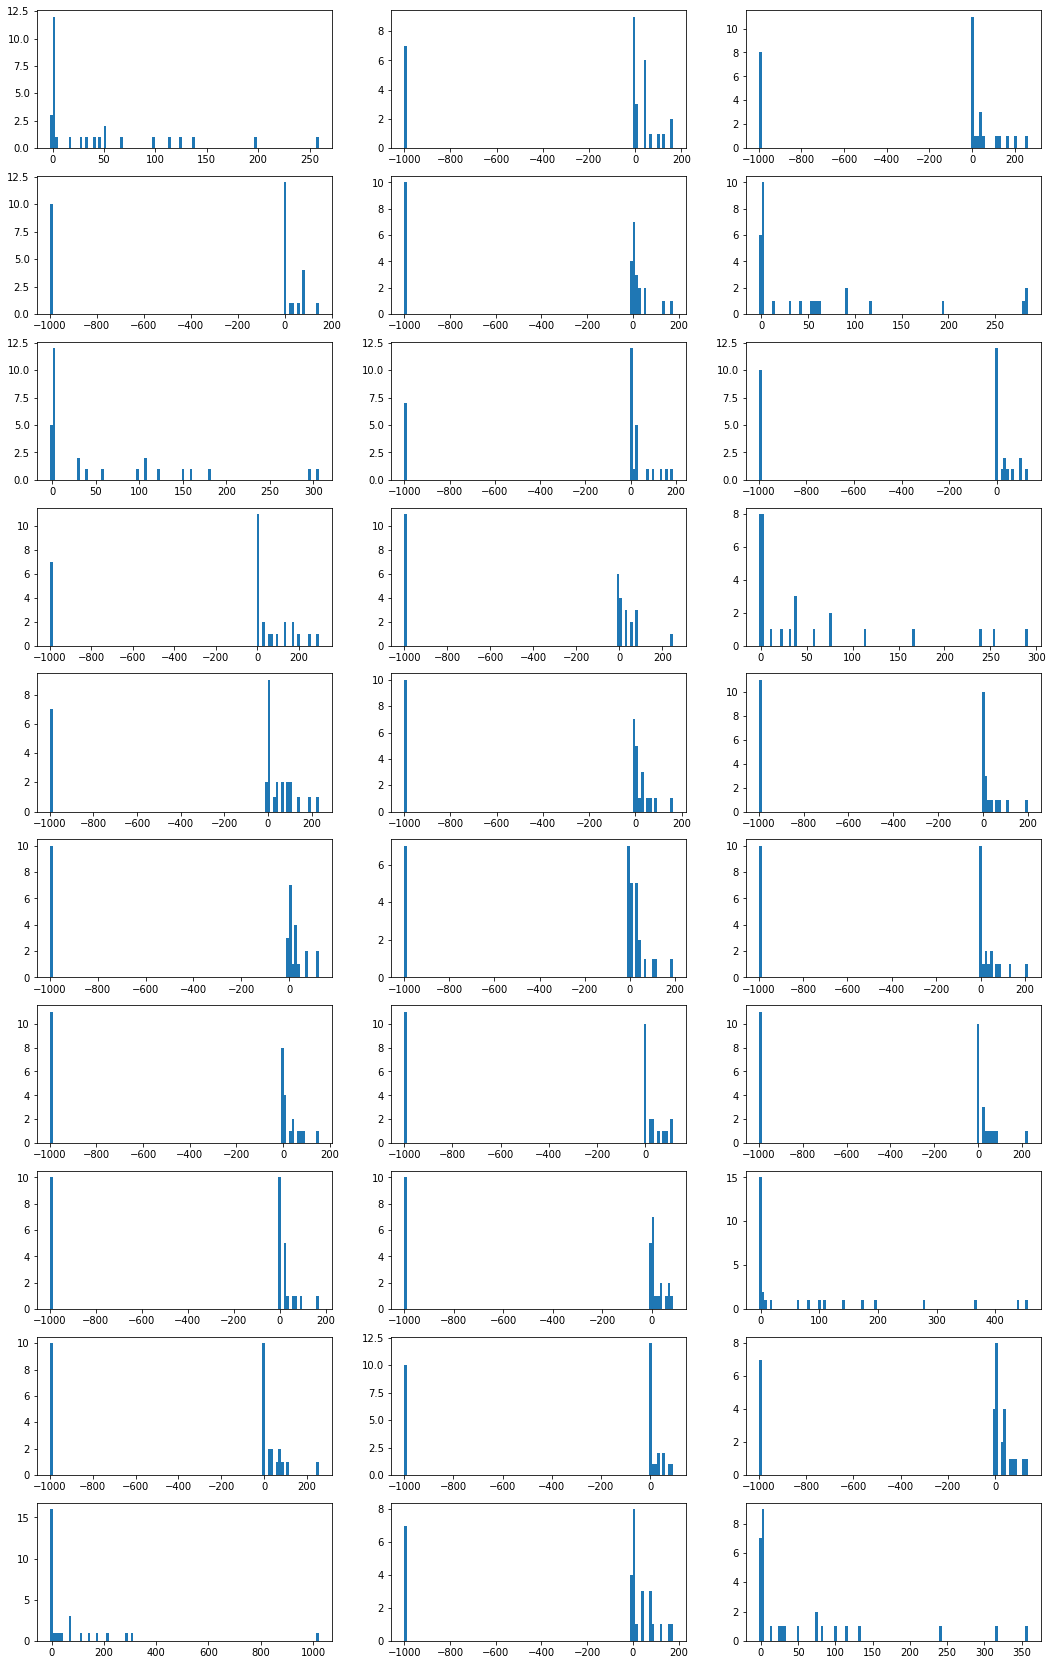

In [83]:
def plot_hists(tx):
    num_rows = 10
    num_cols = 3
    f, a = plt.subplots(num_rows, num_cols, figsize=(18,30))

    a = a.ravel()

    for idx, ax in enumerate(a):
        ax.hist(tx[idx], bins = 100)
        
plot_hists(tx)

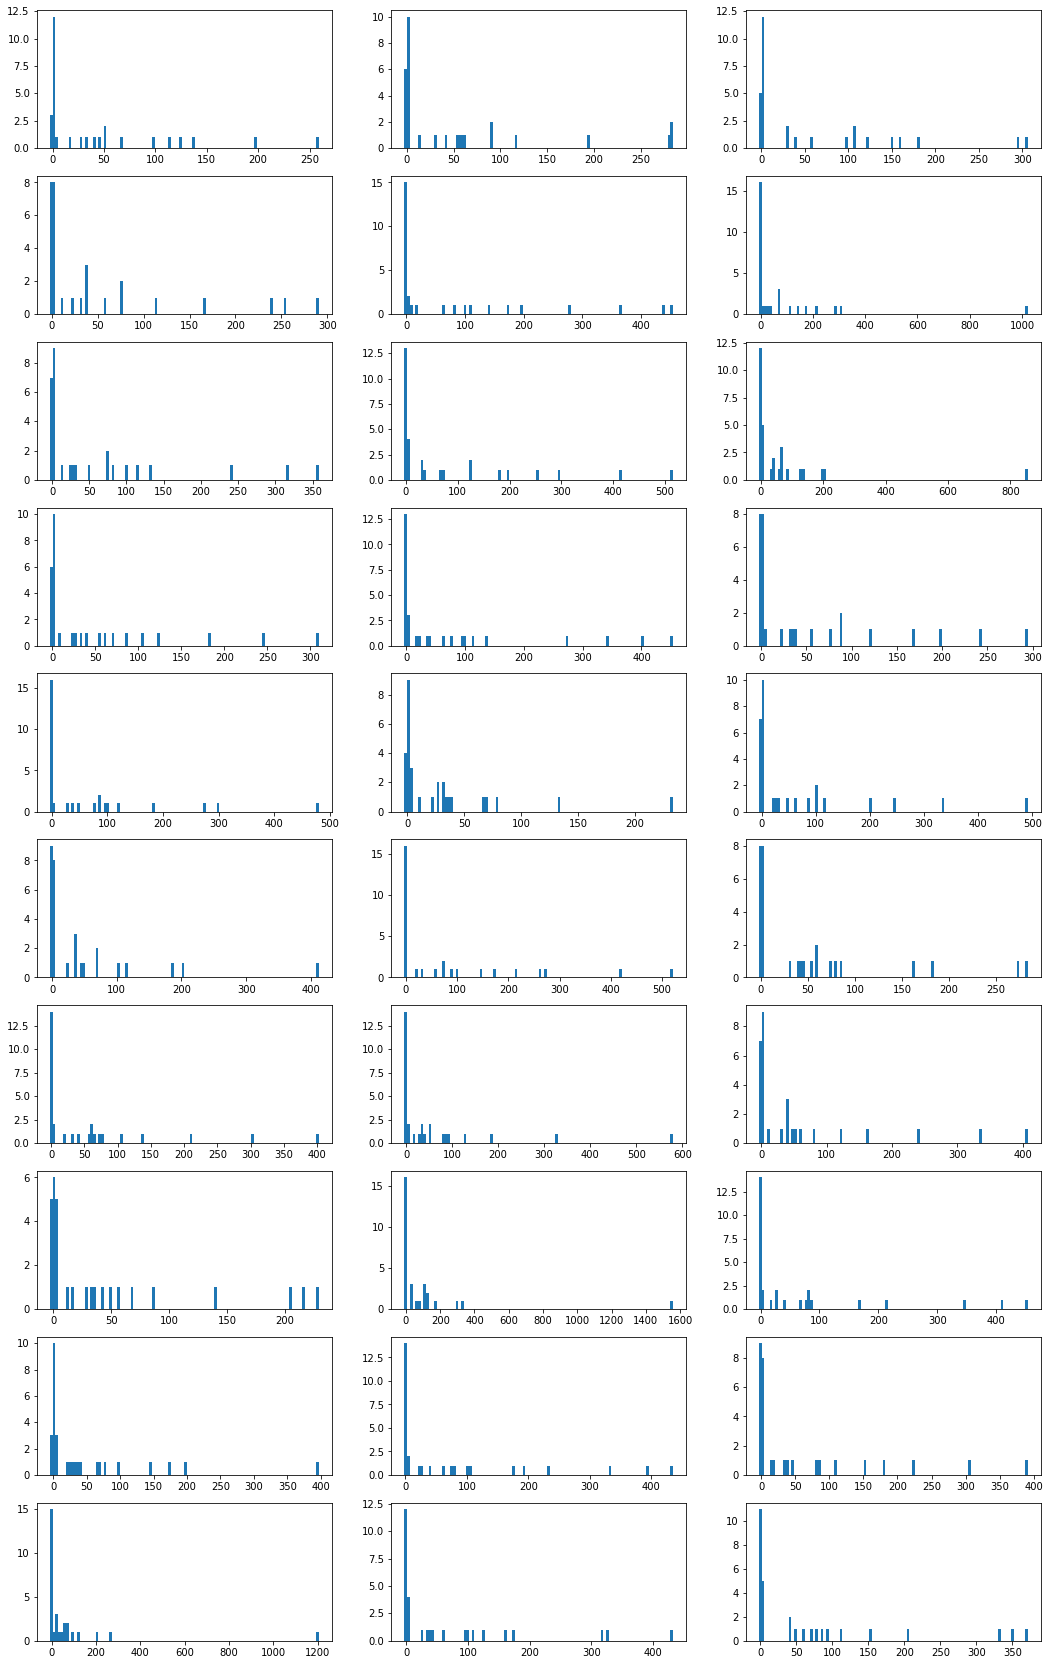

In [139]:
tx_df = pd.DataFrame(tx)
tx_dropna = tx_df[tx_df.isin([-999]).any(axis=1) != True]
tx_d = tx_dropna.to_numpy()

plot_hist(tx_d)

In [43]:
mean_tx = np.mean(tx, axis=0)
std_tx = np.std(tx, axis=0)
max_tx = np.max(tx, axis=0)
min_tx = np.min(tx, axis=0)



mean_tx, std_tx,max_tx, min_tx


(array([-4.90230794e+01,  4.92398193e+01,  8.11819816e+01,  5.78959617e+01,
        -7.08420675e+02, -6.01237051e+02, -7.09356603e+02,  2.37309984e+00,
         1.89173324e+01,  1.58432217e+02,  1.43760943e+00, -1.28304708e-01,
        -7.08985189e+02,  3.87074191e+01, -1.09730480e-02, -8.17107200e-03,
         4.66602072e+01, -1.95074680e-02,  4.35429640e-02,  4.17172345e+01,
        -1.01191920e-02,  2.09797178e+02,  9.79176000e-01, -3.48329567e+02,
        -3.99254314e+02, -3.99259788e+02, -6.92381204e+02, -7.09121609e+02,
        -7.09118631e+02,  7.30645914e+01]),
 array([406.34483401,  35.34481492,  40.82860887,  63.65555431,
        454.47965615, 657.97098617, 453.01897051,   0.78290955,
         22.2734492 , 115.70588372,   0.84474126,   1.19358245,
        453.59581401,  22.41203584,   1.21407622,   1.81675941,
         22.06487828,   1.26497962,   1.81660763,  32.8946274 ,
          1.81221908, 126.49925272,   0.97742435, 532.96172343,
        489.33730734, 489.33290465, 479.